# Projeto de análise de dados do naufrágio do Titanic

## Levantamento dos principais fatores que tornaram os passageiros mais propensos a sobreviver. Quais foram? 
    1 - Os mais ricos tiveram prioridades para embarcar nos botes salva-vidas e se salvarem?
    2 - O gênero masculino e feminino foi relevante para a sobrevivência?
    3 - A idade de cada passageio teve algum impacto para sobreviver no naufrágil?

    O processo de análise de dados tem como base um arquivo csv com registros de 891 passageiros abordo do Titanic. Sendo assim, o principal foco desta análise é investigar e descobrir quais os principais fatores tornaram as pessoas mais propensas a sobreviver.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv("titanic-data-6.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza de Dados

In [27]:
# Verificando as inconsistências dos dados como por exemplo elementos nulos e registros duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Removendo campos desnecessários
Analisando o dataframe existem alguns itens que para está análise não são necessários. Assim, como processo de limpeza, seão removidos os campos do dataframe de acordo com a lista abaixo:
    - Cabin
    - Ticket 
    - Embarked
    - SibSp
    - Parch
    - Fare

In [108]:
# Removendo colunas que serão irrelevantes para análise dos dados
df.drop(['Cabin','Ticket','Embarked','SibSp','Parch','Fare'], axis=1, inplace=True)

### Trabalhando com valores nulos
No dataframe existem alguns registros que podem possuir campos nulos. Desta forma, será necessário aplicar sobre este campos nulos valores de acordo com a média do campo em questão

In [29]:
# Completando os valores nulos com a média
campo = 'Age'
mean = df[campo].mean()
df[campo] = df[campo].fillna(mean)

### Removendo registros duplicados
No dataframe pode existir alguns registros duplicado. Para isso faremos uma verificação e se houver dupliciade, será realizado um drop no registro em questão.

In [30]:
# Removendo dados duplicados
duplicados = sum(df.duplicated())
if duplicados > 0 :
    print("Existem " + str(duplicados) + " registros duplicados.")
    df.drop_duplicates(inplace=True)
else :
    print("Não há registros duplicados.")

Não há registros duplicados.


### Confirmando a limpeza dos dados

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


# Processo de Exploração de Dados 

In [37]:
# Estatística dos passageiros do titanic
df.describe().round()

,PassengerId,Survived,Pclass,Age
count,891.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0
std,257.0,0.0,1.0,13.0
min,1.0,0.0,1.0,0.0
25%,224.0,0.0,2.0,22.0
50%,446.0,0.0,3.0,30.0
75%,668.0,1.0,3.0,35.0
max,891.0,1.0,3.0,80.0


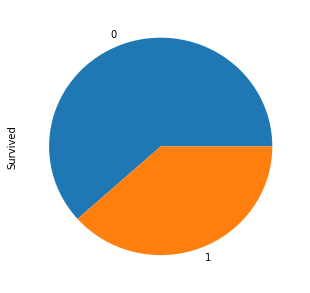

In [86]:
df['Survived'].value_counts().plot(kind="pie",figsize=(5,5))

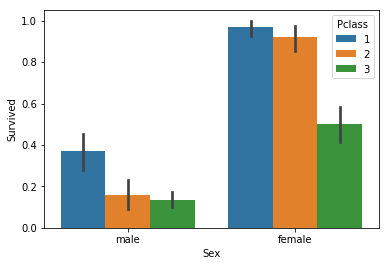

In [12]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

### Identificando correlações dos elementos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274AA21EDD8>,
      dtype=object)

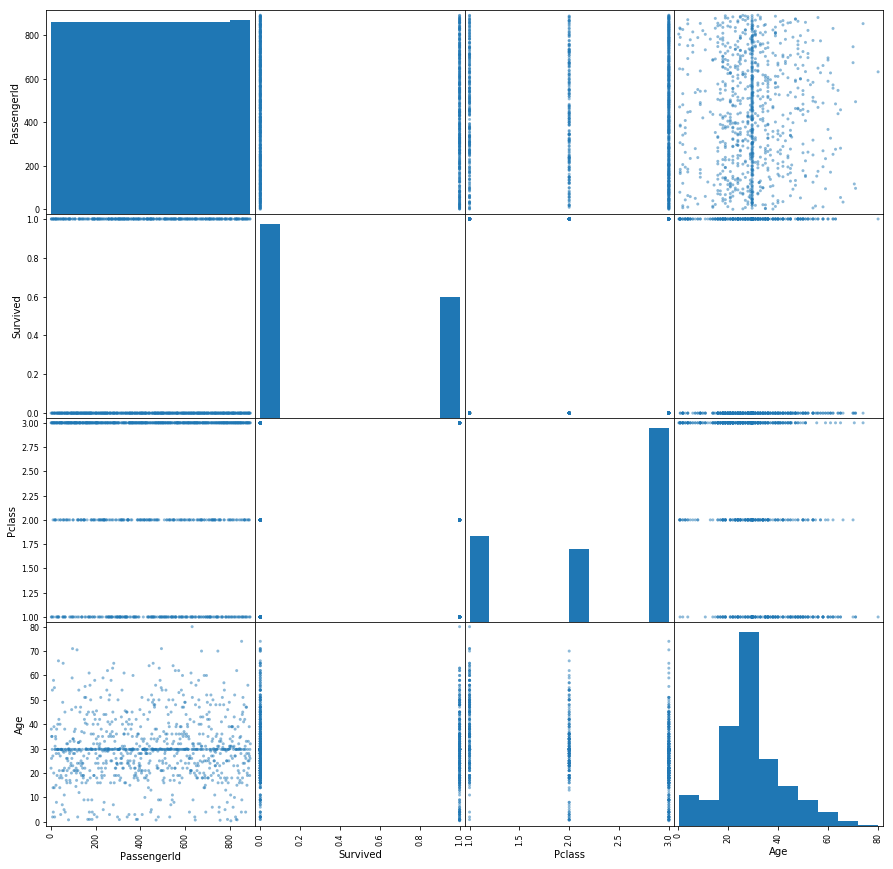

In [63]:
# Identificando correlações dos elementos
pd.plotting.scatter_matrix(df,figsize=(15,15))

### Identificando alguns fatores

In [138]:

dfs = df.query('Survived == 1')

total_passageiros = df.count()['Survived']
total_sobreviventes = dfs.count()['Survived']
total_nao_sobreviventes = total_passageiros - total_sobreviventes
# Quantos foram os que sobrevieram
print('Haviam {} passageiros abordo do navio.'.format(total_passageiros))
print('Destes {0} passageiros, {1} sobreviveram e {2} não sobreviveram a catástrofe.'.format(total_passageiros,total_sobreviventes,total_nao_sobreviventes))
# Quantos foram os que morreram na catástrofe ?
print('Em um contexto geral por sobreviventes, a média de sobreviventes pertenciam a classe {0} e possuiam cerca {1} anos de idade'.format(int(dfs.mean().round()['Pclass']),int(dfs.mean().round()['Age'])))

Haviam 891 passageiros abordo do navio.
Destes 891 passageiros, 342 sobreviveram e 549 não sobreviveram a catástrofe.
Em um contexto geral por sobreviventes, a média de sobreviventes pertenciam a classe 2 e possuiam cerca 28 anos de idade


### Analisando os dados por grupo social, gênero e idade

In [164]:
def groupby_dataFrama(data):
    df = data.groupby(['Pclass', 'Sex']).count()['Survived']
    return df


In [165]:
# Obtendo todos os passageiros abordo
passageiros = groupby_dataFrama(df)
passageiros

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

In [166]:
# Selecionando somente os sobrviventes

# Obtendo sobreviventes por classe e sexo
sobreviventes = groupby_dataFrama(dfs)
sobreviventes

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

### Comparativo de sobreviventes por faixa etária

In [171]:

# Obtendo todas crianças e adolescentes abordo do navio
df_cr = df.query('Age < 18')
# Obtendo crianças e adolescentes sobreviventes do navio
dfs_cr = dfs.query('Age < 18')
# Obtendo todos os adultos abordo do navio
df_adt = df.query('Age > 17')
# Obtendo adultos sobreviventes navio
dfs_adt = dfs.query('Age > 17')
# Obtendo todos os idosos abordo do navio
    
def obter_sobreviventes_faixa_etaria():
    # def sobreviventes_faixa_etária():
    #     return {'crianca':[len(df_cr),len(dfs_cr)],'adulto':[len(df_adt),len(dfs_adt)],'idoso':[len(df_id),len(dfs_id)]}
    # df_fe = sobreviventes_faixa_etária()
    # df_fe = pd.DataFrame(data=df_fe)
    # # show_grfc_titanic("s",df_fe)
    # sns.barplot(x="crianca", y="adulto", data=df_fe);
    return pd.DataFrame(data={'crianca':[len(df_cr),len(dfs_cr)],'adulto':[len(df_adt),len(dfs_adt)]})

df_fe = obter_sobreviventes_faixa_etaria()
print('Comparativo de sobreviventes por faixa etária')
print(df_fe)
pc_cr = round((df_fe['crianca'][1] /df_fe['crianca'][0])*100)
pc_adt = round((df_fe['adulto'][1] /df_fe['adulto'][0])*100)
print('Em média cerca de {0}% das crinças sobreviveram ao naufrágio e em torno de {1}% dos adultos sobreviveram'.format(pc_cr,pc_adt))

Comparativo de sobreviventes por faixa etária
   adulto  crianca
0     601      113
1     229       61
Em média cerca de 54.0% das crinças sobreviveram ao naufrágio e em torno de 38.0% dos adultos sobreviveram


In [172]:
def show_grfc_titanic(title,data):
    colors = ['orange','orange','blue','blue','green','green']
    data.plot(kind='bar', title=title, color=colors, alpha=0.7)
    plt.xlabel('Classe e Gênero',fontsize=18)
    plt.ylabel('Sobreviveram',fontsize=18)

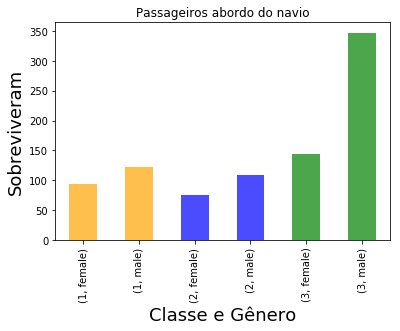

In [173]:
show_grfc_titanic('Passageiros abordo do navio',passageiros)

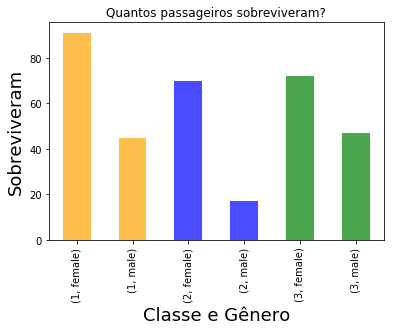

In [158]:
show_grfc_titanic('Quantos passageiros sobreviveram?',sobreviventes)

### ANÁLISE GERAL DE SOBREVIVENTES

Text(0,0.5,'Sobreviveram')

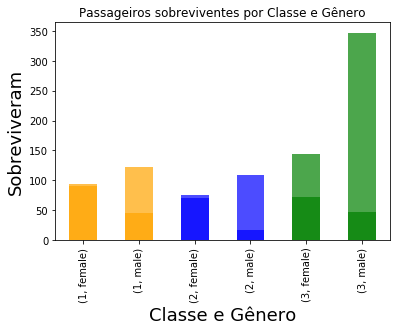

In [159]:
colors = ['orange','orange','blue','blue','green','green']
sobreviventes.plot(kind='bar', color=colors, alpha=0.7)
passageiros.plot(kind='bar', title='Passageiros sobreviventes por Classe e Gênero', color=colors, alpha=0.7)
plt.xlabel('Classe e Gênero',fontsize=18)
plt.ylabel('Sobreviveram',fontsize=18)

Text(0,0.5,'Sobreviveram')

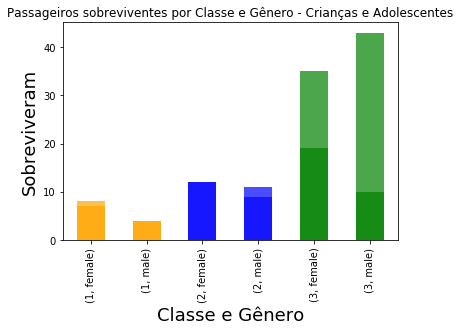

In [160]:
passageiros = df_cr.groupby(['Pclass', 'Sex']).count()['Survived']
sobreviventes = dfs_cr.groupby(['Pclass', 'Sex']).count()['Survived']

colors = ['orange','orange','blue','blue','green','green']
passageiros.plot(kind='bar', color=colors, alpha=0.7)
sobreviventes.plot(kind='bar', title='Passageiros sobreviventes por Classe e Gênero - Crianças e Adolescentes', color=colors, alpha=0.7)
plt.xlabel('Classe e Gênero',fontsize=18)
plt.ylabel('Sobreviveram',fontsize=18)

Análise de sobreviventes por faixa etária - Adultos

Text(0,0.5,'Sobreviveram')

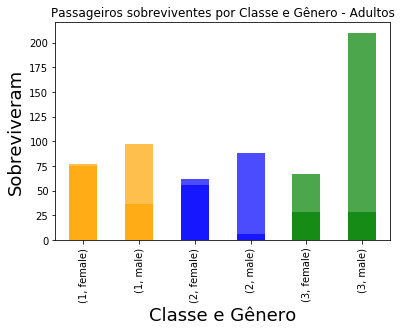

In [161]:
passageiros = df_adt.groupby(['Pclass', 'Sex']).count()['Survived']
sobreviventes = dfs_adt.groupby(['Pclass', 'Sex']).count()['Survived']

colors = ['orange','orange','blue','blue','green','green']
passageiros.plot(kind='bar', color=colors, alpha=0.7)
sobreviventes.plot(kind='bar', title='Passageiros sobreviventes por Classe e Gênero - Adultos', color=colors, alpha=0.7)
plt.xlabel('Classe e Gênero',fontsize=18)
plt.ylabel('Sobreviveram',fontsize=18)

Análise de sobreviventes por faixa etária - Idosos

Text(0,0.5,'Sobreviveram')

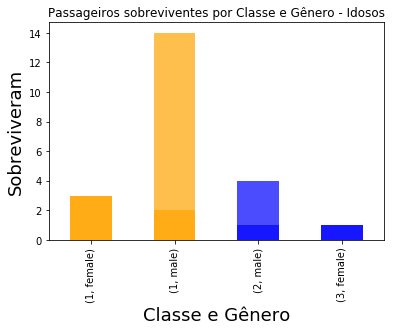

In [162]:
passageiros = df_id.groupby(['Pclass', 'Sex']).count()['Survived']
sobreviventes = dfs_id.groupby(['Pclass', 'Sex']).count()['Survived']

colors = ['orange','orange','blue','blue','green','green']
passageiros.plot(kind='bar', color=colors, alpha=0.7)
sobreviventes.plot(kind='bar', title='Passageiros sobreviventes por Classe e Gênero - Idosos', color=colors, alpha=0.7)
plt.xlabel('Classe e Gênero',fontsize=18)
plt.ylabel('Sobreviveram',fontsize=18)

# Conclusão da Análise de Dados 

Conforme todos os fatores levantados, todas as análise realizadas, ficou um tanto quanto claro que em proporção, não houve uma prioridade de salvação por classes sociais e sim por gênero e por faixa etária onde idosos e crianças do sexo feminino tiveram uma diferença na quantidade de sobreviventes superior a de adultos do sexo masculino. 

In [163]:



Qual o sexo mais relevante entre os sobreviventes ?

Qual a relação entre as tarifas e os sobreviventes ?

SyntaxError: invalid syntax (<ipython-input-163-521fd870df02>, line 4)